## Imports

In [1]:
import pandas as pd
import tensorflow

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

## Get database

In [2]:
with open("database2.csv") as db:
    df = pd.read_csv(db)

# Normalize data
df_min_max_scaled = df.copy()
#df_min_max_scaled["in"] = (df_min_max_scaled["in"] - df_min_max_scaled["in"].min()) / (df_min_max_scaled["in"].max() - df_min_max_scaled["in"].min())    
  
# view normalized data
display(df_min_max_scaled)
    
# Separate data from the labels
Y = df_min_max_scaled.iloc[:, 1:]
X = df_min_max_scaled.iloc[:, 0]

# Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

,in,1,2,3,4
0,0.246,0,0,0,0
1,0.244,0,0,0,0
2,0.245,0,0,0,0
3,0.244,0,0,0,0
4,0.246,0,0,0,0
...,...,...,...,...,...
555,0.244,0,0,0,0
556,0.245,0,0,0,0
557,0.246,0,0,0,0
558,0.244,0,0,0,0


## Time to plot!

Clean everything, stacked bars graph reference: https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

Text(0, 0.5, 'Corriente (A)')

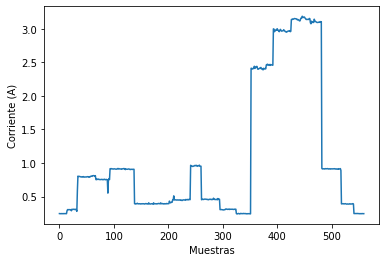

In [3]:
time = range(len(X))
consumption = list(X)

plt.plot(time, consumption)
plt.xlabel('Muestras')
plt.ylabel('Corriente (A)')

Text(0, 0.5, 'Nº Dispositivos')

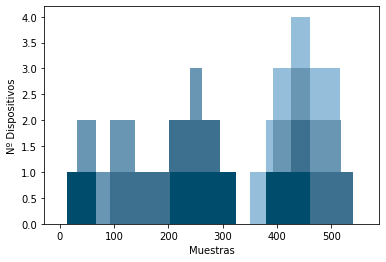

In [4]:
time = range(len(X))
n_devices = list(Y.sum(axis=1))

colors = ["#004c6d", "#3d708f", "#6996b3", "#94bed9", "#c1e7ff"]
bottom = [0] * len(X)
for i in range(4):
    # print(X.iloc[:,i])
    plt.bar(time, Y.iloc[:,i], width=2.0, bottom=bottom, color=colors[i])
    bottom += Y.iloc[:,i]

plt.xlabel('Muestras')
plt.ylabel('Nº Dispositivos')

## Building the model

https://www.machinecurve.com/index.php/2020/11/16/creating-a-multilabel-neural-network-classifier-with-tensorflow-and-keras/

In [5]:
model = Sequential()

model.add(Dense(64, input_shape=(1, ), activation='relu', name='dense_1'))
model.add(Dense(32, activation='relu', name='dense_2'))
model.add(Dense(16, activation='relu', name='dense_3'))
model.add(Dense(8, activation='relu', name='dense_4'))
model.add(Dense(8, activation='relu', name='dense_5'))
model.add(Dense(4, activation='linear', name='dense_output'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_output (Dense)         (None, 4)                 36        
Total params: 2,980
Trainable params: 2,980
Non-trainable params: 0
______________________________________________________

In [6]:
import tensorflow.random
tensorflow.random.set_seed(2)

history = model.fit(X_train, Y_train, epochs=100, validation_split=0.05, verbose=0)

Text(0, 0.5, 'Nº Devices')

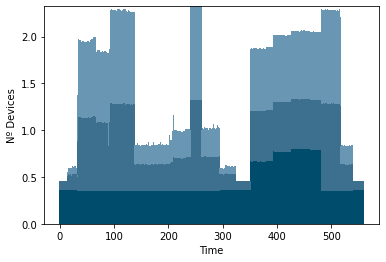

In [7]:
predicted_Y_np = model.predict(X)
a = predicted_Y_np.clip(min=0, max=1)
predicted_Y = pd.DataFrame(data=a)
time = range(len(X))
n_devices = list(predicted_Y.sum(axis=1))

colors = ["#004c6d", "#3d708f", "#6996b3", "#94bed9", "#c1e7ff"]
bottom = [0] * len(X)
for i in range(4):
    plt.bar(time, predicted_Y.iloc[:,i], width=2.0, bottom=bottom, color=colors[i])
    bottom += predicted_Y.iloc[:,i]

plt.xlabel('Time')
plt.ylabel('Nº Devices')

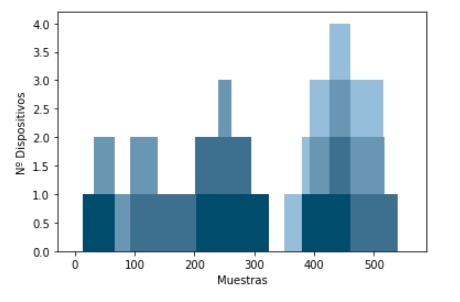